In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

ds1=pd.read_csv(r'C:\Users\KIIT\Downloads\Compressed\HR Analytics\train_LZdllcl.csv')
ds1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
missing_val=ds1.isna().sum()
missing_val

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df1=pd.get_dummies(ds1['education'],drop_first=True)


In [14]:
ds=pd.concat([df1,ds1],axis=1)
ds.drop('education',axis=1,inplace=True)
ds.head()


,Below Secondary,Master's & above,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1,65438,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,1,0,49,0
1,0,0,65141,Operations,region_22,m,other,1,30,5.0,4,0,0,60,0
2,0,0,7513,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,0,50,0
3,0,0,2542,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,0,50,0
4,0,0,48945,Technology,region_26,m,other,1,45,3.0,2,0,0,73,0


In [15]:
mean_Pyr=float(ds['previous_year_rating'].mean())

In [16]:
ds['previous_year_rating']=ds['previous_year_rating'].fillna(mean_Pyr)

In [17]:
ds['previous_year_rating'].isnull().sum()

0

In [18]:
ds.isnull().sum()

Below Secondary         0
Master's & above        0
employee_id             0
department              0
region                  0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [19]:
df1=pd.get_dummies(ds['department'],drop_first=True)
df1

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,1
54804,0,0,0,1,0,0,0,0
54805,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,1,0


In [20]:
ds=pd.concat([df1,ds],axis=1)
ds.drop('department',axis=1,inplace=True)
ds.head()


,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,...,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,1,0,0,1,...,f,sourcing,1,35,5.0,8,1,0,49,0
1,0,0,0,1,0,0,0,0,0,0,...,m,other,1,30,5.0,4,0,0,60,0
2,0,0,0,0,0,0,1,0,0,0,...,m,sourcing,1,34,3.0,7,0,0,50,0
3,0,0,0,0,0,0,1,0,0,0,...,m,other,2,39,1.0,10,0,0,50,0
4,0,0,0,0,0,0,0,1,0,0,...,m,other,1,45,3.0,2,0,0,73,0


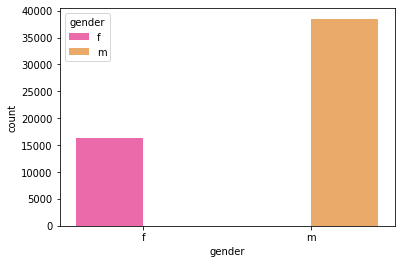

In [21]:
sns.countplot(x='gender',hue='gender',data=ds,palette='spring');


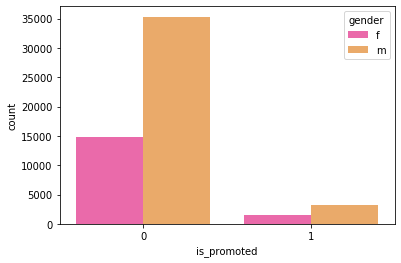

In [22]:
sns.countplot(x='is_promoted',hue='gender',data=ds,palette='spring');



In [23]:
df1=pd.get_dummies(ds['recruitment_channel'],drop_first=True)
df1

,referred,sourcing
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
54803,0,1
54804,0,0
54805,0,0
54806,0,1


In [24]:
ds=pd.concat([df1,ds],axis=1)
ds.drop('recruitment_channel',axis=1,inplace=True)
ds.head()

,referred,sourcing,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,...,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1,0,0,0,0,0,0,1,0,...,region_7,f,1,35,5.0,8,1,0,49,0
1,0,0,0,0,0,1,0,0,0,0,...,region_22,m,1,30,5.0,4,0,0,60,0
2,0,1,0,0,0,0,0,0,1,0,...,region_19,m,1,34,3.0,7,0,0,50,0
3,0,0,0,0,0,0,0,0,1,0,...,region_23,m,2,39,1.0,10,0,0,50,0
4,0,0,0,0,0,0,0,0,0,1,...,region_26,m,1,45,3.0,2,0,0,73,0


In [25]:
df1=pd.get_dummies(ds['gender'],drop_first=True)
df1

,m
0,0
1,1
2,1
3,1
4,1
...,...
54803,1
54804,0
54805,1
54806,1


In [26]:
ds=pd.concat([df1,ds],axis=1)
ds.drop('gender',axis=1,inplace=True)
ds.head()

,m,referred,sourcing,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,...,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,1,0,0,0,0,0,0,1,...,65438,region_7,1,35,5.0,8,1,0,49,0
1,1,0,0,0,0,0,1,0,0,0,...,65141,region_22,1,30,5.0,4,0,0,60,0
2,1,0,1,0,0,0,0,0,0,1,...,7513,region_19,1,34,3.0,7,0,0,50,0
3,1,0,0,0,0,0,0,0,0,1,...,2542,region_23,2,39,1.0,10,0,0,50,0
4,1,0,0,0,0,0,0,0,0,0,...,48945,region_26,1,45,3.0,2,0,0,73,0


In [27]:
df1=pd.get_dummies(ds['region'],drop_first=True)
df1

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
ds=pd.concat([df1,ds],axis=1)
ds.drop('region',axis=1,inplace=True)
ds.head()

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,Master's & above,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,0,0,0,0,...,1,65438,1,35,5.0,8,1,0,49,0
1,0,0,0,0,0,0,0,0,0,0,...,0,65141,1,30,5.0,4,0,0,60,0
2,0,0,0,0,0,0,0,0,0,1,...,0,7513,1,34,3.0,7,0,0,50,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2542,2,39,1.0,10,0,0,50,0
4,0,0,0,0,0,0,0,0,0,0,...,0,48945,1,45,3.0,2,0,0,73,0


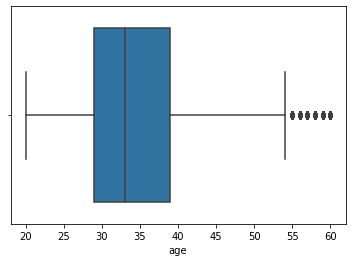

In [29]:
sns.boxplot(ds['age'])

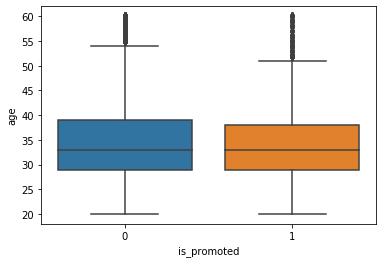

In [30]:
sns.boxplot(ds['is_promoted'],ds['age'])

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = ds.iloc[:,0:22]  
y = ds.iloc[:,-1]  

In [32]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score'] 

In [35]:
featureScores

,Attributes,Score
0,region_10,0.347749
1,region_11,14.092319
2,region_12,2.358246
3,region_13,0.096831
4,region_14,1.104339
5,region_15,1.345499
6,region_16,4.543791
7,region_17,27.374863
8,region_18,1.113891
9,region_19,6.749243


In [36]:
print(featureScores.nlargest(10,'Score')) 

   Attributes      Score
13  region_22  69.467225
7   region_17  27.374863
20  region_29  22.408078
16  region_25  17.320507
19  region_28  16.970103
15  region_24  16.128546
14  region_23  14.892939
1   region_11  14.092319
17  region_26  13.905907
12  region_21   9.029809


In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predict = regression.predict(x_test)
print(predict)

[0 0 0 ... 0 0 0]


In [47]:
print(y_test)

37412    0
54578    0
30523    0
16420    0
3248     0
        ..
14598    0
43777    0
23913    0
44258    0
41114    0
Name: is_promoted, Length: 10962, dtype: int64


In [50]:
print(classification_report(y_test,predict))
print(accuracy_score(y_test,predict)*100)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9987
           1       0.00      0.00      0.00       975

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.83      0.91      0.87     10962

91.1056376573618


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
